# Point Pattern Analysis

## Centrography of Point Patterns

Centrography refers to a set of descriptive statistics that provide summary descriptions of point patterns. Let's explore three types of centrography analysis for point patterns.

In [2]:
# Run this cell to install pointpats library
%pip install -U pointpats

In [7]:
import numpy as np
from pointpats import PointPattern
%matplotlib inline
import matplotlib.pyplot as plt

#import centragraphy analysis functions 
from pointpats.centrography import hull, mbr, mean_center, weighted_mean_center, manhattan_median, std_distance,euclidean_median,ellipse

We will explore three measurements:

`Central Tendency`
* mean_center: calculate the mean center of the unmarked point pattern.
* weighted_mean_center: calculate the weighted mean center of the marked point pattern.

`Dispersion and Orientation`
* std_distance: calculate the standard distance

`Shape Analysis`
* hull: calculate the convex hull of the point pattern
* mbr: calculate the minimum bounding box (rectangle)

All of the above functions operate on a series of coordinate pairs. That is, the data type of the first argument should be  (𝑛,2) array_like. In case that you have a point pattern (PointPattern instance), you need to pass its attribute "points" instead of itself to these functions.

In [3]:
points = [[66.22, 32.54], [22.52, 22.39], [31.01, 81.21],
          [9.47, 31.02],  [30.78, 60.10], [75.21, 58.93],
          [79.26,  7.68], [8.23, 39.93],  [98.73, 77.17],
          [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]]
pp = PointPattern(points) #create a point pattern "pp" from list
pp.points 

,x,y
0,66.22,32.54
1,22.52,22.39
2,31.01,81.21
3,9.47,31.02
4,30.78,60.10
5,75.21,58.93
6,79.26,7.68
7,8.23,39.93
8,98.73,77.17
9,89.78,42.53


We can use PointPattern class method plot to visualize pp.

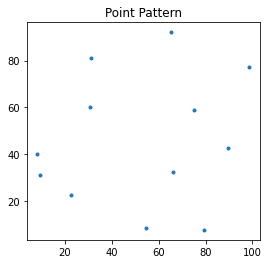

In [4]:
pp.plot()

### Central Tendency

Central Tendency concerns about the center point of the two-dimensional distribution. It is similar to the first moment of a one-dimensional distribution. There are several ways to measure central tendency, each having pros and cons. We need to carefully select the appropriate measure according to our objective and data status.

<b>Mean Center</b> (𝑥<sub>𝑚𝑐</sub>, 𝑦<sub>𝑚𝑐</sub>)

$$
  x_{mc} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$
$$
  y_{mc} = \frac{1}{n} \sum_{i=1}^{n} y_i
$$

In [8]:
mc = mean_center(pp.points)
mc

array([52.57166667, 46.17166667])

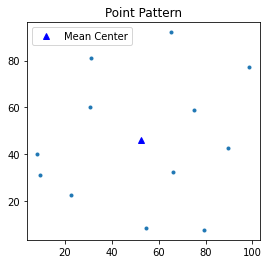

In [9]:
pp.plot()
plt.plot(mc[0], mc[1], 'b^', label='Mean Center')
plt.legend(numpoints=1)

Weighted Mean Center  (𝑥<sub>𝑤𝑚𝑐</sub>, 𝑦<sub>𝑤𝑚𝑐</sub>)

$$
x_{wmc} = \sum_{i=1}^{n} \frac{w_i x_i}{\sum_{i=1}^{n} w_i}
$$

$$
y_{wmc} = \sum_{i=1}^{n} \frac{w_i y_i}{\sum_{i=1}^{n} w_i}
$$

Weighted mean center is meant for marked point patterns. Aside from the first argument which is a seris of  (𝑥,𝑦) coordinates in weighted_mean_center function, we need to specify its second argument which is the weight for each event point.

In [10]:
weights = np.arange(12)
weights

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [11]:
wmc = weighted_mean_center(pp.points, weights)
wmc

array([60.51681818, 47.76848485])

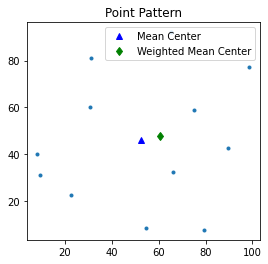

In [12]:
pp.plot() #use class method "plot" to visualize point pattern
plt.plot(mc[0], mc[1], 'b^', label='Mean Center') 
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.legend(numpoints=1)

### Dispersion and Orientation

<b>Standard Distance & Standard Distance Circle</b>

$$
SD = \sqrt{\frac{\sum_{i=1}^{n} (x_i - x_m)^2}{n} + \frac{\sum_{i=1}^{n} (y_i - y_m)^2}{n}}
$$

The Standard distance is closely related to the usual definition of the standard deviation of a data set, and it provides a measure of how dispersed the events are around their mean center (𝑥𝑚,𝑦𝑚). Taken together, these measurements can be used to plot a summary circle (standard distance circle) for the point pattern, centered at  (𝑥𝑚,𝑦𝑚) with radius 𝑆𝐷, as shown below.